# Task 3 - Clustering (28 points)

**Task Definition:** In this task, you try different clustering algorithms and evaluate them using the *Normalized Mutual Information (NMI)* and the *(Adjusted) Rand Score*. For the evaluation you can use the sklearn.metrics package. Try 4 different clustering techniques on the 4 datasets. Plot the clustering results and colour the points belonging to the same cluster with the same colour.

**Input:** The data folder cointaines the input files (`dataset1_noClusters2.csv`, `dataset2_noClusters2.csv`, `dataset3_noClusters2.csv`, `dataset4_noClusters7.csv`). In each dataset the data points have 2 features and 1 label, the number of clusters are in the name of the files. Don't forget to remove the labels when you apply clustering methods on the datasets. You need to cluster every data set with at least one clustering method.

**Clustering methods:** Use a clustering method from each of the 4 categories. For the evaluation try to find the best clustering result possible to get with your chosen clustering method. Discuss your results and explain why each clustering method succeeded or failed to cluster the data.
1. K-Means or K-Means++
2. Hierarchical clustering (single, complete or average linkage)
3. DBSCAN
4. Expectation Maximization

**Points:** In total you get 16 points for the implementation (clustering, plots, evaluation with numbers) and 12 points for the report (explanation, evaluation in text).

In [1]:
# TODO: uncomment the packages you used, please do not import additional non-native packages
# you may change the imports to the following format: from [package] import [class, method, etc.]

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import scipy
import seaborn as sns

In the first step, we load the datasets and preprocess them by removing the labels which are the last columns in each dataset and scale them by using StandardScaler. They are then stored in 'preprocessed_data'.

In [2]:
from sklearn.preprocessing import StandardScaler

datasets = ['dataset1_noClusters2.csv', 'dataset2_noClusters2.csv', 'dataset3_noClusters2.csv', 'dataset4_noClusters7.csv']

#preprocess the data
preprocessed_data = []
for dataset in datasets:
    df = pd.read_csv(dataset)
    features = df.iloc[:, :-1]   #remove labels (last column)
    
    #standardize the features
    scaler = StandardScaler()
    standardized_features = scaler.fit_transform(features)
    
    preprocessed_data.append(standardized_features)

Now, we apply the four clustering methods, K-Means/K-Means++, Hierarchical clustering, DBSCAN and Expectation Maximization, to preprocessed_data. For applying these clustering methods, scikit.learn library is used.

When using K-Means, memory leakage error occurs. Since this is a small scale problem, I ignore it within the code.

In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')

clustered_data = []
clustering_methods = ['K-Means', 'Hierarchical', 'DBSCAN', 'Expectation Maximization']

for i, data in enumerate(preprocessed_data):
    #K-Means
    kmeans = KMeans(n_clusters=int(datasets[i][-5]), n_init=10, random_state=42)
    kmeans_clusters = kmeans.fit_predict(data)
    clustered_data.append(kmeans_clusters)

    #Hierarchical clustering
    linkage = ['single', 'complete', 'average']
    hierarchical = AgglomerativeClustering(n_clusters=int(datasets[i][-5]), linkage=linkage[i % len(linkage)])
    hierarchical_clusters = hierarchical.fit_predict(data)
    clustered_data.append(hierarchical_clusters)

    #DBSCAN
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    dbscan_clusters = dbscan.fit_predict(data)
    clustered_data.append(dbscan_clusters)

    #Expectation Maximization
    em = GaussianMixture(n_components=int(datasets[i][-5]), random_state=42)
    em_clusters = em.fit_predict(data)
    clustered_data.append(em_clusters)


Now we evaluate the results by calculating Normalized Mutual Information (NMI) and the (Adjusted) Rand Score. For this sklearn.metrics is used. 

credits; <br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html <br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html 

In [4]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

#reading ground truth labels from the datasets
ground_truth_labels = []
for dataset in datasets:
    df = pd.read_csv(dataset)
    labels = df.iloc[:, -1]
    ground_truth_labels.append(labels)

evaluation_scores = []

for i, labels in enumerate(ground_truth_labels):
    for j in range(len(clustering_methods)):
        method_scores = []

        #NMI score
        nmi_score = normalized_mutual_info_score(labels, clustered_data[i * len(clustering_methods) + j])
        method_scores.append(nmi_score)

        #Adjusted Rand Score
        rand_score = adjusted_rand_score(labels, clustered_data[i * len(clustering_methods) + j])
        method_scores.append(rand_score)

        evaluation_scores.append(method_scores)

clustering_methods = ['K-Means', 'Hierarchical', 'DBSCAN', 'Expectation Maximization']

for i in range(len(datasets)):
    print(f"Dataset {i+1}:")
    for j in range(len(clustering_methods)):
        method_scores = evaluation_scores[i * len(clustering_methods) + j]
        nmi_score = method_scores[0]
        rand_score = method_scores[1]
        print(f"{clustering_methods[j]} - NMI: {nmi_score:.4f}, Adjusted Rand Score: {rand_score:.4f}")
    print()


Dataset 1:
K-Means - NMI: 0.3741, Adjusted Rand Score: 0.4717
Hierarchical - NMI: 1.0000, Adjusted Rand Score: 1.0000
DBSCAN - NMI: 1.0000, Adjusted Rand Score: 1.0000
Expectation Maximization - NMI: 0.3877, Adjusted Rand Score: 0.4869

Dataset 2:
K-Means - NMI: 1.0000, Adjusted Rand Score: 1.0000
Hierarchical - NMI: 0.3362, Adjusted Rand Score: 0.2920
DBSCAN - NMI: 0.0023, Adjusted Rand Score: 0.0078
Expectation Maximization - NMI: 0.7502, Adjusted Rand Score: 0.8453

Dataset 3:
K-Means - NMI: 0.1978, Adjusted Rand Score: 0.2594
Hierarchical - NMI: 0.0059, Adjusted Rand Score: 0.0000
DBSCAN - NMI: 0.0092, Adjusted Rand Score: 0.0003
Expectation Maximization - NMI: 0.9624, Adjusted Rand Score: 0.9840

Dataset 4:
K-Means - NMI: 0.8363, Adjusted Rand Score: 0.7293
Hierarchical - NMI: 0.8849, Adjusted Rand Score: 0.8058
DBSCAN - NMI: 0.8359, Adjusted Rand Score: 0.7338
Expectation Maximization - NMI: 0.9062, Adjusted Rand Score: 0.7886



Finally, we plot the clustering results. The clusters are arranged with colors.

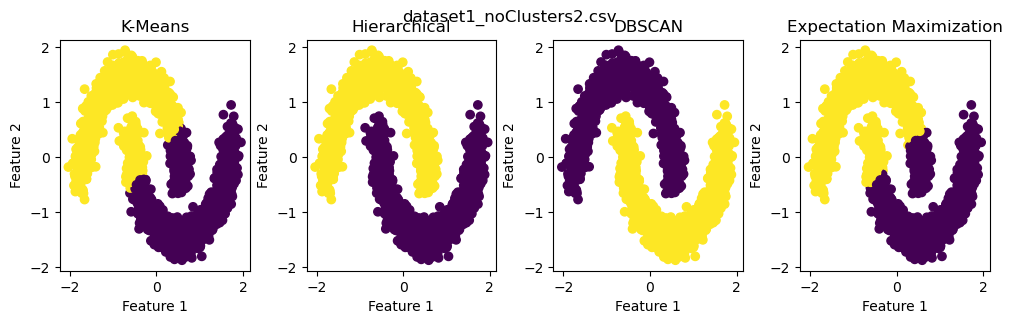

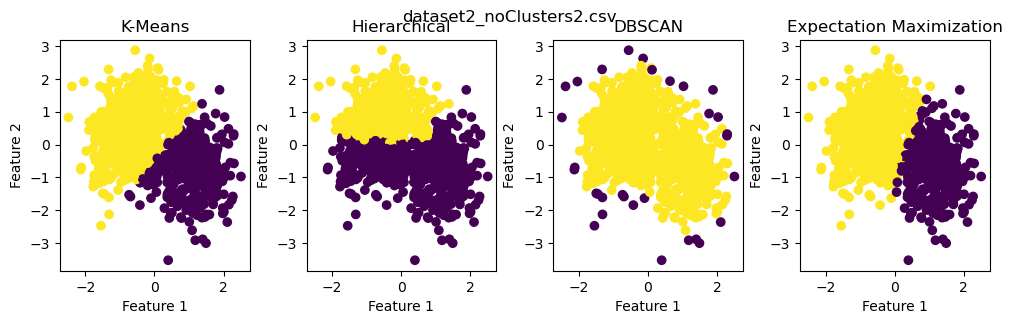

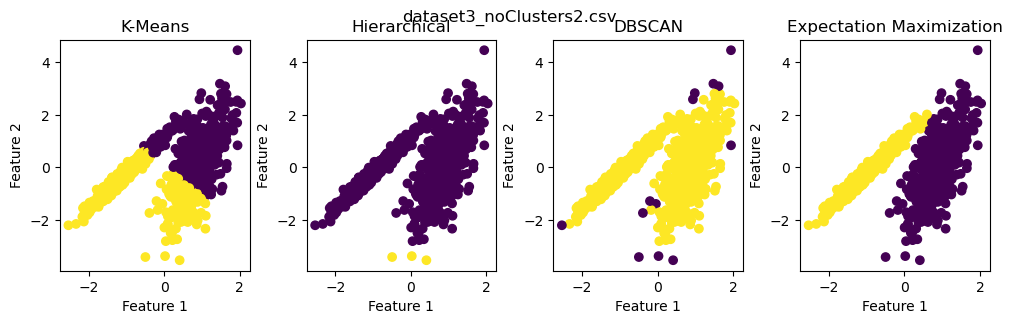

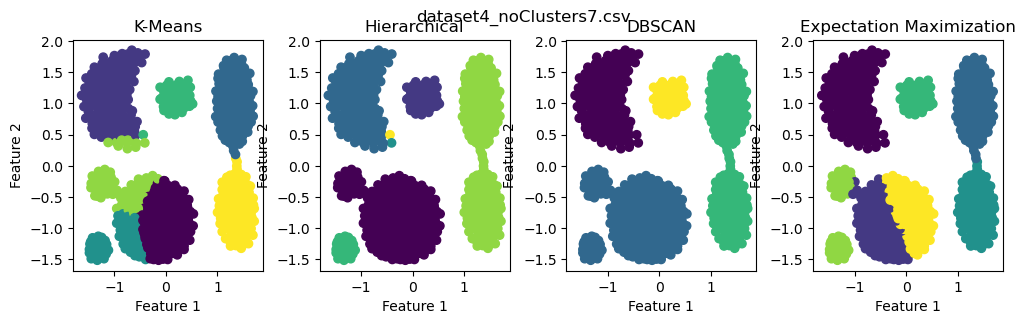

In [5]:
for i, dataset in enumerate(datasets):
    plt.figure(figsize=(12, 3))
    plt.subplots_adjust(wspace=0.3)
    plt.suptitle(f"{dataset}")

    for j in range(len(clustering_methods)):
        plt.subplot(1, len(clustering_methods), j + 1)
        plt.scatter(preprocessed_data[i][:, 0], preprocessed_data[i][:, 1], c=clustered_data[i * len(clustering_methods) + j])
        plt.title(clustering_methods[j])
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

    plt.show()


NMI ranges from 0 to 1, with 1 indicating a perfect match between the clustering results and the ground truth labels. The Adjusted Rand Score ranges from -1 to 1, with 1 indicating a perfect match between the clustering results and the ground truth labels.

For Dataset 1: Hierarchical clustering and DBSCAN achieved perfect NMI and Adjusted Rand Score, indicating that they were able to accurately cluster the data. K-Means and Expectation Maximization achieved moderate scores.

For Dataset 2: K-Means achieved a perfect score, DBSCAN method performed poorly, Hierarchical clustering achieved moderate scores, the Expectation Maximization algorithm captured the clusters to some extent, but there is room for improvement.

For Dataset 3: Expectation Maximization achieved a high NMI and Adjusted Rand Score, indicating successful clustering, while the other methods performed poorly with significantly lower scores.

For Dataset 4: All methods performed relatively well, with high NMI and Adjusted Rand Scores, indicating successful clustering.

Overall, these scores are a good way to evaluate which algorithm works the best for each dataset. K-Means generally work well with spherical, similar sized clusters and easily separable clusters, it may not be an optimal choice with non-linear data.
On the other hand, Hierarchical clustering can handle various shapes, however, it may not have accurate results with large datasets. DBSCAN is useful for identifying clusters of arbitrary shapes and it can handle noise, but, it needs careful tuning of parameters when preprocessing data. Expectation Maximization can work with different shapes and sizes, however, it makes the assumption that the data is generated from Gaussian distribution and it can struggle when it isn't the case.